# image_samples.ipynb

Plots sample crop images.

Author: Connacher Murphy

In [2]:
# Import libraries
import os
import matplotlib.pyplot as plt
import cv2
from types import SimpleNamespace
from torch.utils.data import DataLoader

import pest_classification as pest

In [3]:
df = pest.df
crops = pest.crops
crop_descriptions = pest.crop_descriptions
path = pest.path

print(df)

print(df["crop_description"].unique())

       crop    set crop_description  \
0     Maize  train      leaf beetle   
1     Maize  train      leaf beetle   
2     Maize  train      leaf beetle   
3     Maize  train      leaf beetle   
4     Maize  train      leaf beetle   
...     ...    ...              ...   
5284  Maize   test     streak virus   
5285  Maize   test     streak virus   
5286  Maize   test     streak virus   
5287  Maize   test     streak virus   
5288  Maize   test     streak virus   

                                              file  label  
0      Maize/train/leaf beetle/leaf beetle240_.jpg      3  
1      Maize/train/leaf beetle/leaf beetle349_.jpg      3  
2      Maize/train/leaf beetle/leaf beetle272_.jpg      3  
3      Maize/train/leaf beetle/leaf beetle387_.jpg      3  
4      Maize/train/leaf beetle/leaf beetle285_.jpg      3  
...                                            ...    ...  
5284  Maize/test/streak virus/streak virus557_.jpg      6  
5285  Maize/test/streak virus/streak virus470_.jpg 

Maize leaf beetle


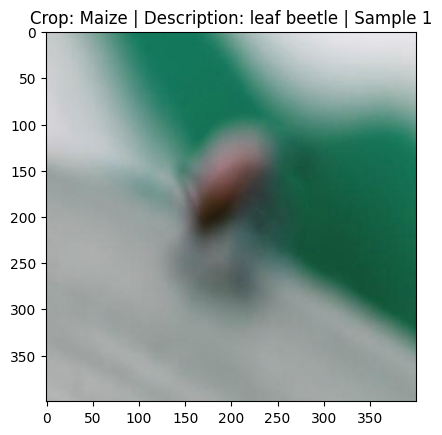

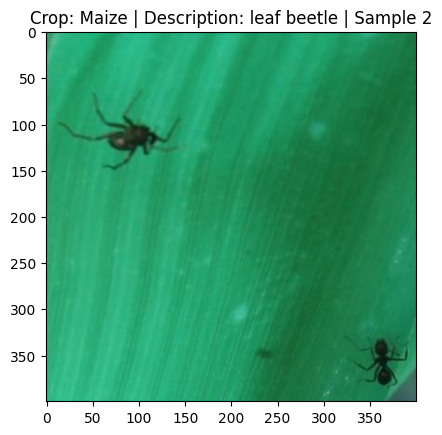

Maize healthy


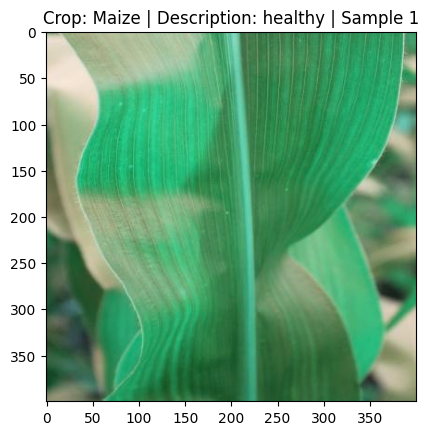

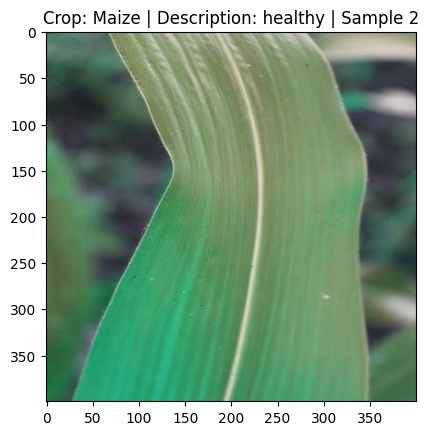

Maize fall armyworm


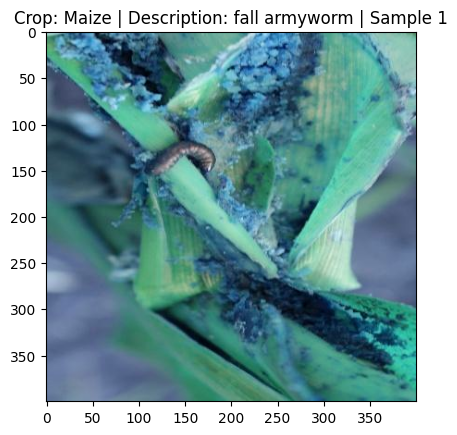

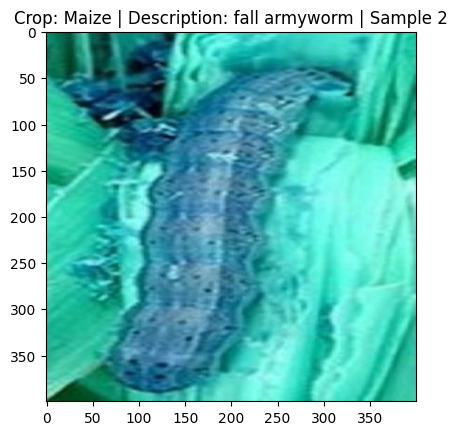

Maize leaf spot


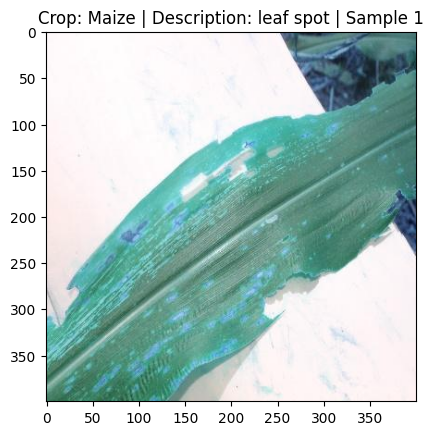

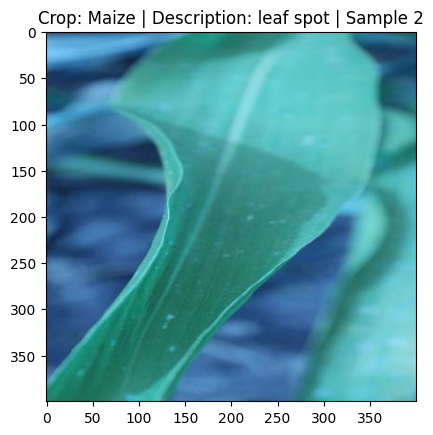

Maize grasshopper


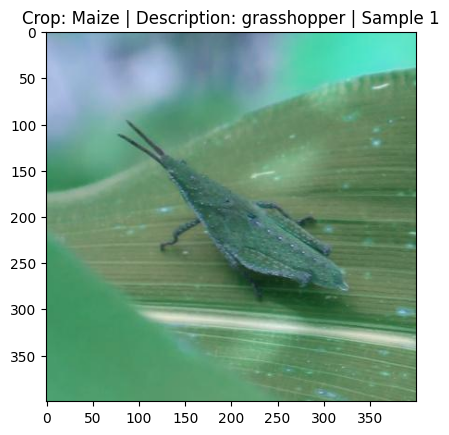

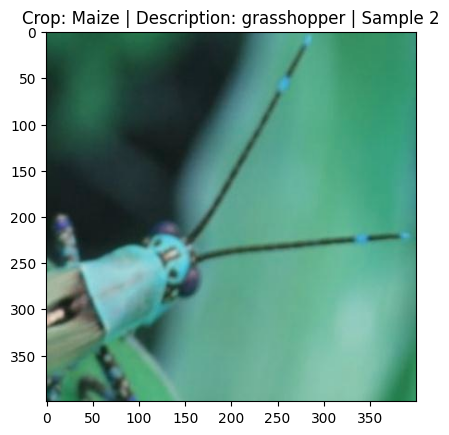

Maize leaf blight


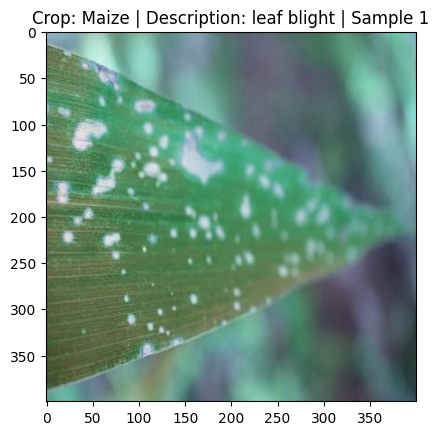

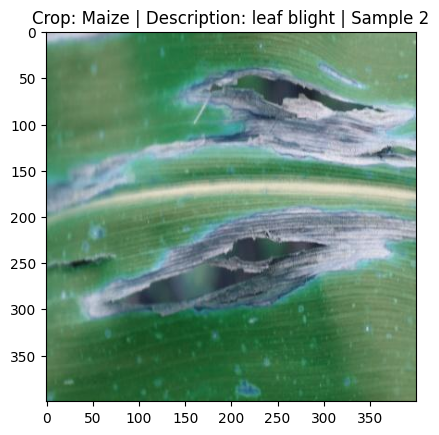

Maize streak virus


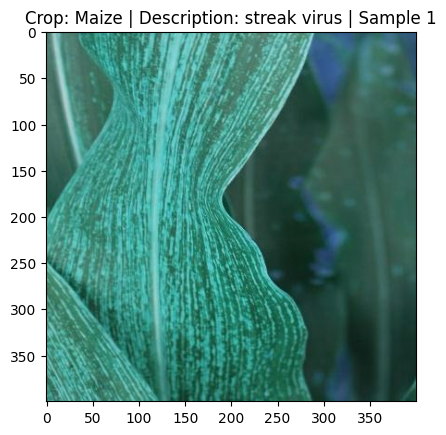

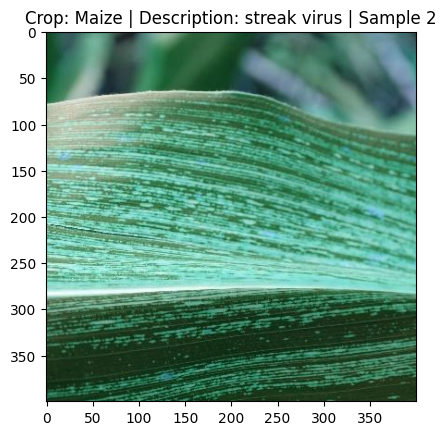

In [4]:
# Plot sample few images
for crop in crops:
    for crop_description in crop_descriptions[crop].values():
        print(crop, crop_description)
        for i in range(2):
            img = cv2.imread(
                os.path.join(
                    path,
                    df[
                        (df["crop"] == crop)
                        & (df["set"] == "train")
                        & (df["crop_description"] == crop_description)
                    ]["file"].iloc[i],
                )
            )

            plt.imshow(img)
            plt.title(f"Crop: {crop} | Description: {crop_description} | Sample {i + 1}")
            plt.show()

In [5]:
# Try the data loader
config = SimpleNamespace(**{})

config.batch_size = 32

# config.image_dir = os.path.expanduser("~/data/ccmt_proc_240311")
# config.image_size = 256

valid_dataset = pest.AugmentedCCMT(config, df[df["set"] == "test"])
train_dataset = pest.AugmentedCCMT(config, df[df["set"] == "train"], transform=pest.transform_train)

valid_dataloader = DataLoader(
    valid_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    num_workers=0,
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=config.batch_size,
    shuffle=True,
    num_workers=0,
)

In [6]:
for (image_batch, label_batch) in valid_dataloader:
    print(image_batch.shape)
    print(label_batch.shape)
    break

torch.Size([32, 3, 224, 224])
torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


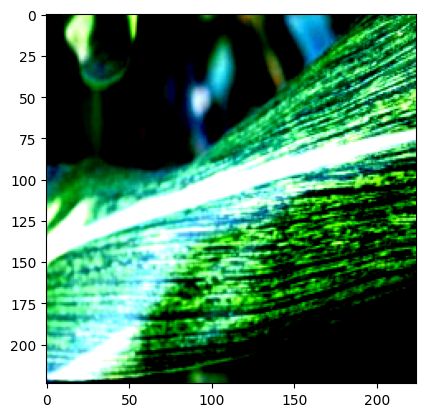

In [7]:
# Get one batch of images and labels
image_batch, label_batch = next(iter(valid_dataloader))

image_tensor = image_batch[0]
if image_tensor.shape[0] == 3:
    image_tensor = image_tensor.permute(1, 2, 0)
image_numpy = image_tensor.numpy()

# Plot the image
plt.imshow(image_numpy)
plt.show()

# CM: can I undo the normalization?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


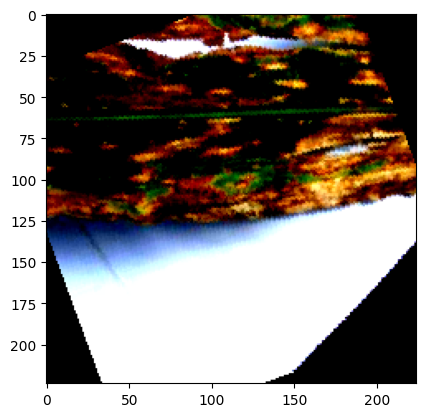

In [8]:
# Get one batch of images and labels
image_batch, label_batch = next(iter(train_dataloader))

image_tensor = image_batch[0]
if image_tensor.shape[0] == 3:
    image_tensor = image_tensor.permute(1, 2, 0)
image_numpy = image_tensor.numpy()

# Plot the image
plt.imshow(image_numpy)
plt.show()